In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate

#path_img = 'data'
bs = 128

from google.colab import drive
drive.mount('/content/drive')

path_img = 'drive/My Drive/code/pomodoro_tracker/data'

Mounted at /content/drive


In [2]:
dls = ImageDataLoaders.from_folder(path_img, valid_pct=0.2, bs=bs, item_tfms=Resize(224))

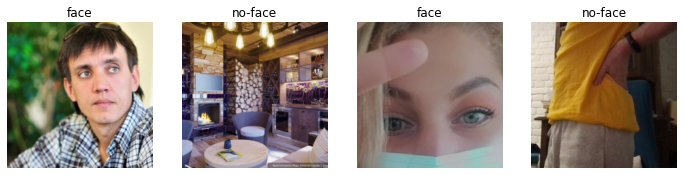

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

In [3]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.050206,0.236803,0.026846,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.041073,0.214594,0.020134,00:25


In [5]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.100150,0.263591,0.026846,00:25


In [7]:
learn.export()

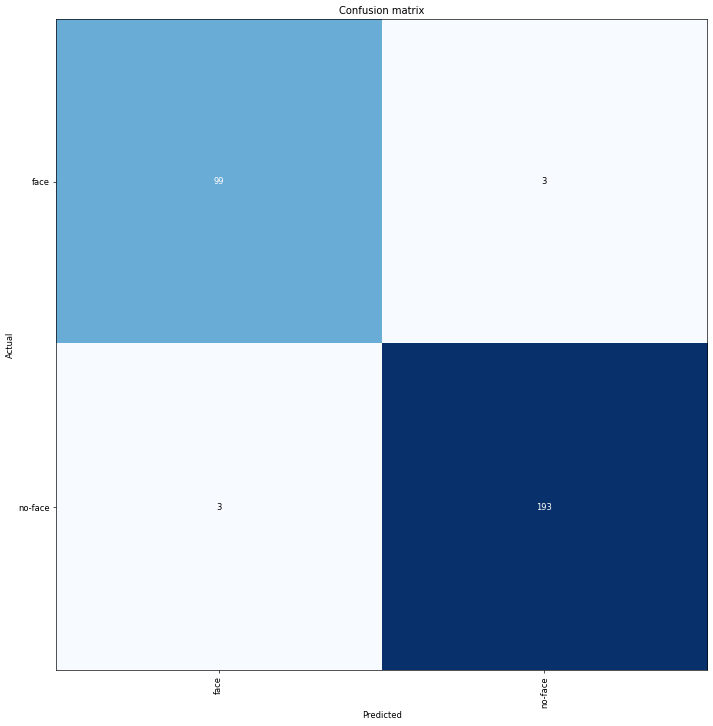

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [9]:
interp.most_confused(min_val=5)

[('no-face', 'face', 7)]

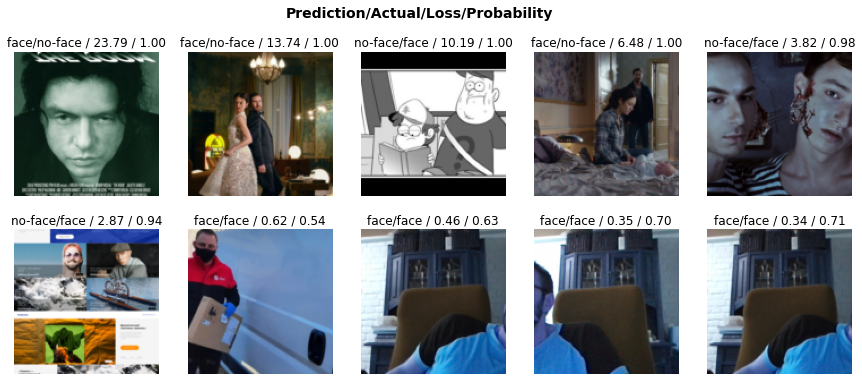

In [16]:
interp.plot_top_losses(10, nrows=2)

In [12]:
interp.print_classification_report()

              precision    recall  f1-score   support

        face       0.94      0.99      0.96       102
     no-face       0.99      0.96      0.98       196

    accuracy                           0.97       298
   macro avg       0.96      0.98      0.97       298
weighted avg       0.97      0.97      0.97       298

